### Import the libraries 

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

### Read the file into Python as a dataframe 

In [3]:
df = pd.read_csv("marketing_customer_analysis.csv")
df.head(5)

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,Married,117,NaN,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


### 1. Show the dataframe info

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4543 entries, 2 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_number                4543 non-null   int64  
 1   customer                       4543 non-null   object 
 2   state                          4543 non-null   object 
 3   customer_lifetime_value        4543 non-null   float64
 4   response                       4543 non-null   object 
 5   coverage                       4543 non-null   object 
 6   education                      4543 non-null   object 
 7   effective_to_date              4543 non-null   object 
 8   employment_status              4543 non-null   object 
 9   gender                         4543 non-null   object 
 10  income                         4543 non-null   int64  
 11  location_code                  4543 non-null   object 
 12  marital_status                 4543 non-null   

### 2. Describe DataFrame

In [18]:
df.describe()

,customer_number,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000,4543.000000
mean,5540.241250,8033.714059,37453.033238,93.773278,15.111820,48.153863,0.386309,2.980189,436.477525
std,3149.146534,6959.529443,30257.399536,35.093661,10.157925,28.146904,0.907553,2.390362,295.026990
min,2.000000,1904.000852,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2884.000000,4039.089902,0.000000,69.000000,6.000000,24.000000,0.000000,1.000000,265.686145
50%,5549.000000,5846.520588,34455.000000,83.000000,14.000000,47.000000,0.000000,2.000000,384.000000
75%,8283.000000,8936.596938,61560.000000,110.000000,23.000000,72.000000,0.000000,4.000000,552.000000
max,10908.000000,83325.381190,99961.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### 3. Show a plot of the total number of responses

In [19]:
df.value_counts('response')
no = 8813
yes = 1466
total_number_of_responses = 8813 + 1466
total_number_of_responses

10279

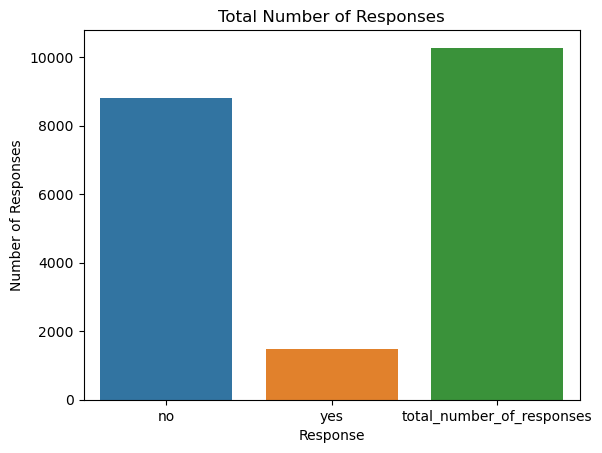

In [20]:
x = ["no", "yes", "total_number_of_responses"]
y = [8813, 1466, 10279]

ax = sns.barplot(x, y);

ax.set(xlabel = "Response", ylabel = "Number of Responses")

plt.title("Total Number of Responses");

plt.show()

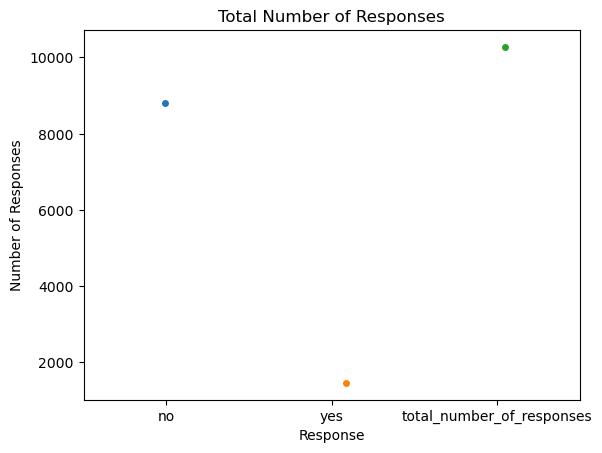

In [21]:
x = ["no", "yes", "total_number_of_responses"]
y = [8813, 1466, 10279]

ax = sns.stripplot(x, y);

ax.set(xlabel = "Response", ylabel = "Number of Responses")

plt.title("Total Number of Responses");

plt.show()

### 4. Show a plot of the response rate by the sales channel

In [22]:
sales_channel = df[["response", "sales_channel"]]
sales_channel

,response,sales_channel
2,No,Call Center
3,Yes,Branch
10,No,Branch
13,No,Call Center
16,No,Call Center
...,...,...
10902,No,Agent
10903,No,Branch
10904,No,Branch
10906,No,Branch


In [23]:
sales_channel.value_counts("response")

response
No     3902
Yes     641
dtype: int64

In [24]:
total_responses = 8813 + 1466
total_responses

10279

In [25]:
sales_channel.value_counts(dropna = True)

response  sales_channel
No        Agent            1419
          Branch           1123
          Call Center       786
          Web               574
Yes       Agent             332
          Branch            123
          Call Center        97
          Web                89
dtype: int64

In [26]:
total_no = 3148 + 2539 + 1792 + 1334
total_yes = 742 + 326 + 221 + 177
total_no, total_yes

(8813, 1466)

In [27]:
agent_response = 3148 + 742
branch_response = 2539 + 326
call_center_response = 1792 + 221
web_response = 1332 + 177
agent_response, branch_response, call_center_response, web_response

(3890, 2865, 2013, 1509)

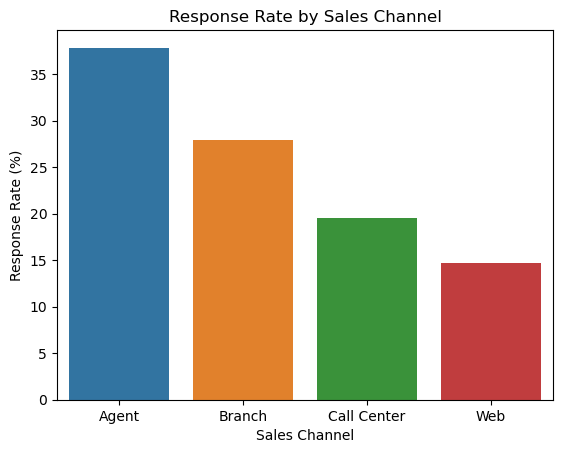

In [28]:
x = ["Agent", "Branch", "Call Center", "Web"]
y = [3890/10279*100, 2865/10279*100, 2013/10279*100, 1509/10279*100]

ax = sns.barplot(x, y);

ax.set(xlabel = "Sales Channel", ylabel = "Response Rate (%)")

plt.title("Response Rate by Sales Channel");

plt.show()

#my understanding of this question was that we are looking at which channel has the highest number of responses (not focusing on 'yes' and 'no'). So the response rate is yes + no as a percentage of the total number of responses

### 5. Show a plot of the response rate by the total claim amount 

In [29]:
total_claim_amount = df[["response", "total_claim_amount"]]
total_claim_amount

,response,total_claim_amount
2,No,480.000000
3,Yes,484.013411
10,No,442.521087
13,No,331.200000
16,No,300.528579
...,...,...
10902,No,655.200000
10903,No,355.200000
10904,No,897.600000
10906,No,273.018929


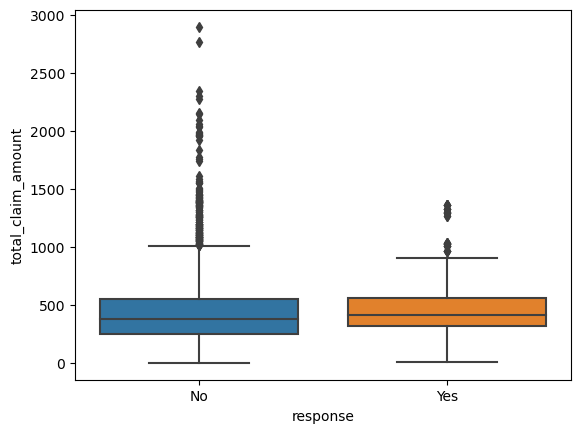

In [31]:
sns.boxplot(x = "response", y = "total_claim_amount", data = df)
plt.show()

### 6. Show a plot of the response rate by income

In [32]:
income = df[["response", "income"]]
income

,response,income
2,No,22139
3,Yes,49078
10,No,82730
13,No,66334
16,No,76717
...,...,...
10902,No,28304
10903,No,59855
10904,No,0
10906,No,61146


<function matplotlib.pyplot.show(close=None, block=None)>

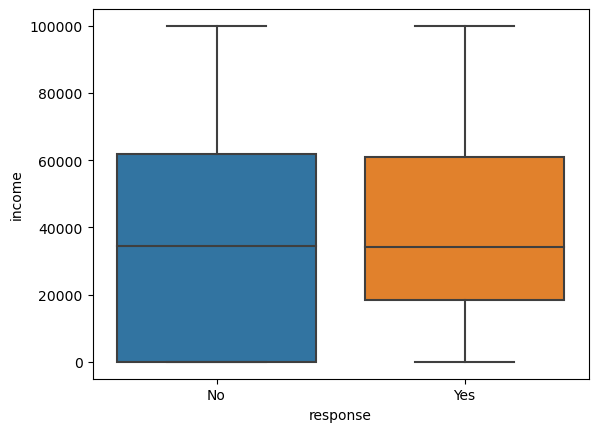

In [33]:
sns.boxplot(x = "response", y = "income", data = df)
plt.show